In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper_functions import *

# Choose Dataset

1: FD001, 
2: FD002, 
3: FD003, 
4: FD004

In [146]:
dataset_id = 3

# Visualisation

In [147]:
path = f'Data/train_FD00{dataset_id}.txt'
setting_names = ['altitude', 'TRA', 'mach_nr']
sensor_names = [f'sensor measurement {i}' for i in range(1, 22)]
column_names = ['unit number', 'cycle'] + setting_names + sensor_names

df = load_data(path, column_names)
df

/Users/mickhekkema/Desktop/MSc Aerospace Engineering/Q4/AE4465 - Maintenance Modelling and Analysis/Assignment/EncoderTransformerArchitecture_CMAPPS-main/helper_functions.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, index_col=None, delim_whitespace=True, header=None, names=column_names)


,unit number,cycle,altitude,TRA,mach_nr,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


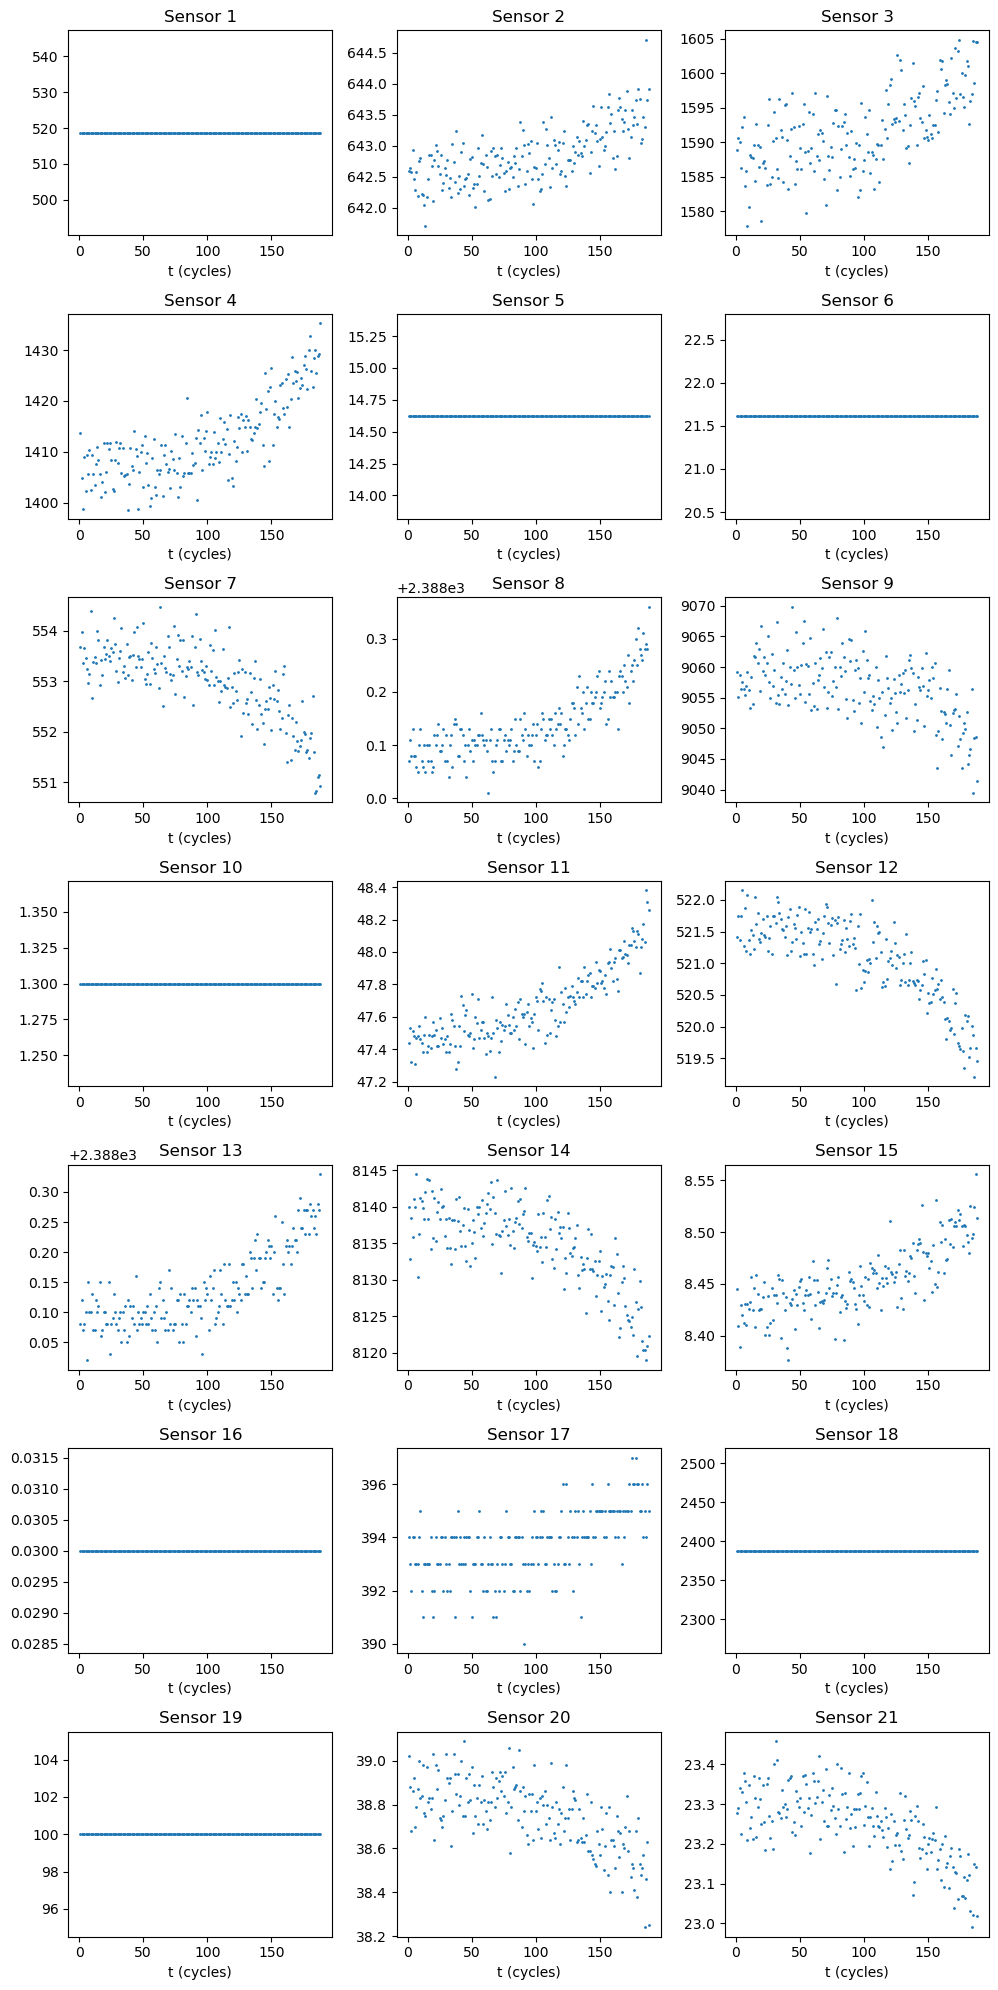

In [148]:
engine_id = 40
sensor_ids = range(1, 22)
plot_all_sensors(df, engine_id, sensor_ids)

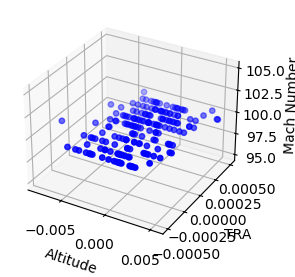

In [149]:
plot_operational_conditions(df, engine_id)

# Clustering

First we add the RUL column

In [150]:
df = df.groupby('unit number').apply(add_rul).reset_index(drop=True)

/var/folders/gm/pvnntq692jd5ng0rtk5l0z9m0000gn/T/ipykernel_24647/3183556084.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('unit number').apply(add_rul).reset_index(drop=True)


Then the operational groups are found by k-means clustering. This only gives relevant clusters for datasets 2 and 4.

In [151]:
cluster_labels = get_operational_clusters(df, dataset_id)
df['op cluster'] = cluster_labels

Uncomment the following code to plot the sensor data for one operational mode. For plot_cluster, choose a operational cluster [0, 1, 2, 3, 4, 5, 6].

In [152]:
# plot_cluster = 5
# df_plot = df[df['op cluster'] == plot_cluster]
# plot_all_sensors(df_plot, engine_id, sensor_ids)

Finally the fault modes are found. For dataset 1 and 2 this will only result in fault mode 0 as they only have one fault mode. Datasets 3 and 4 will have fault modes 0 and 1. 

In [153]:
df = df.groupby('unit number').apply(add_FLAT, dataset_id).reset_index(drop=True)
fault_mode_clusters = df['FLAT'].to_numpy()

/var/folders/gm/pvnntq692jd5ng0rtk5l0z9m0000gn/T/ipykernel_24647/1041331926.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('unit number').apply(add_FLAT, dataset_id).reset_index(drop=True)


In [154]:
df

,unit number,cycle,altitude,TRA,mach_nr,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21,RUL,op cluster,FLAT
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,258,0.0,1
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,257,0.0,1
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,256,0.0,1
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8.3878,0.03,392,2388,100.0,38.96,23.2951,255,0.0,1
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8.3869,0.03,392,2388,100.0,39.14,23.4583,254,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8.5036,0.03,394,2388,100.0,38.44,22.9631,4,0.0,1
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8.5174,0.03,395,2388,100.0,38.50,22.9746,3,0.0,1
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8.5223,0.03,396,2388,100.0,38.39,23.0682,2,0.0,1
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8.5148,0.03,395,2388,100.0,38.31,23.0753,1,0.0,1


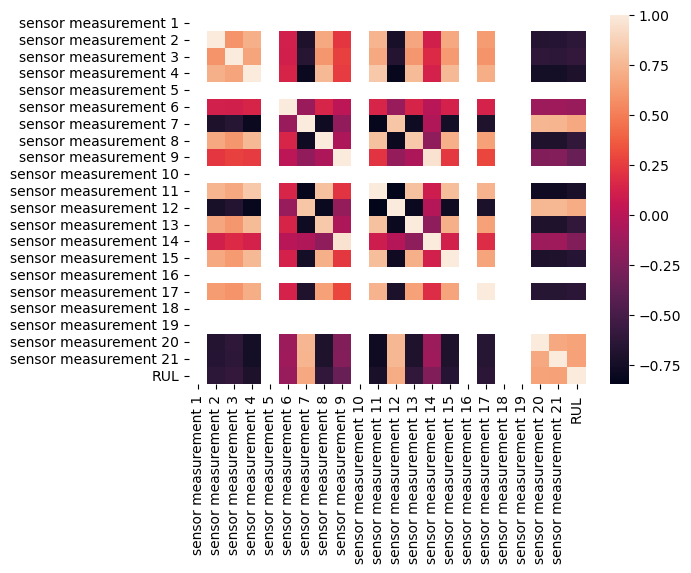

In [155]:
operational_cluster = 5
fault_mode_cluster = 1

if dataset_id == 2:
    df_corr = df[df['op cluster'] == operational_cluster]
    plot_pearson_correlation(df_corr)
elif dataset_id == 3:
    df_corr = df[df['FLAT'] == fault_mode_cluster]
    plot_pearson_correlation(df_corr)
elif dataset_id == 4:
    df_corr = df[df['op cluster'] == operational_cluster]
    df_corr2 = df_corr[df_corr['FLAT'] == fault_mode_cluster]
    plot_pearson_correlation(df_corr2)
else:
    df_corr = df
    plot_pearson_correlation(df_corr)

This plots a histogram of the RUL in the dataset. This is used to get an understanding of the distribution of the RUL in the dataset.

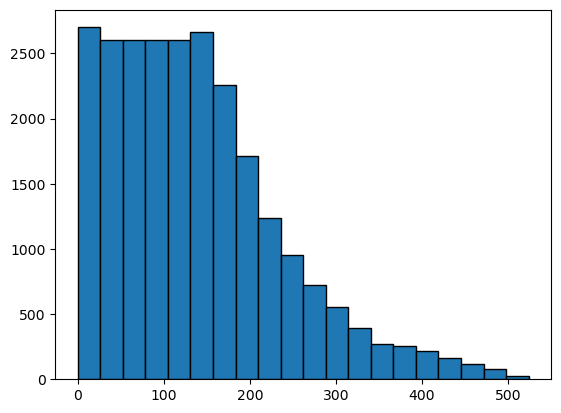

In [156]:
plt.hist(df['RUL'], 20, edgecolor='black')
plt.show()

Non relevant sensors are dropped

In [157]:
df_dropped, drop_ids = drop_sensors(df, dataset_id)
sensor_ids = [item for item in range(1, 22) if item not in drop_ids and item != 10]
sensor_names = [f'sensor measurement {id}' for id in sensor_ids]
df_dropped


,unit number,cycle,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 10,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 17,sensor measurement 20,sensor measurement 21,RUL,op cluster,FLAT
0,1,1,642.36,1583.23,1396.84,553.97,2387.96,9062.17,1.3,47.30,522.31,2388.01,8145.32,8.4246,391,39.11,23.3537,258,0.0,1
1,1,2,642.50,1584.69,1396.89,554.55,2388.00,9061.78,1.3,47.23,522.42,2388.03,8152.85,8.4403,392,38.99,23.4491,257,0.0,1
2,1,3,642.18,1582.35,1405.61,554.43,2388.03,9070.23,1.3,47.22,522.03,2388.00,8150.17,8.3901,391,38.85,23.3669,256,0.0,1
3,1,4,642.92,1585.61,1392.27,555.21,2388.00,9064.57,1.3,47.24,522.49,2388.08,8146.56,8.3878,392,38.96,23.2951,255,0.0,1
4,1,5,641.68,1588.63,1397.65,554.74,2388.04,9076.14,1.3,47.15,522.58,2388.03,8147.80,8.3869,392,39.14,23.4583,254,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,643.78,1596.01,1424.11,551.86,2388.25,9070.82,1.3,48.27,519.66,2388.30,8138.08,8.5036,394,38.44,22.9631,4,0.0,1
24716,100,149,643.29,1596.38,1429.14,551.86,2388.23,9064.60,1.3,48.13,519.91,2388.28,8144.36,8.5174,395,38.50,22.9746,3,0.0,1
24717,100,150,643.84,1604.53,1431.41,551.30,2388.25,9063.45,1.3,48.18,519.44,2388.24,8135.95,8.5223,396,38.39,23.0682,2,0.0,1
24718,100,151,643.94,1597.56,1426.57,550.69,2388.26,9062.22,1.3,48.05,520.01,2388.26,8141.24,8.5148,395,38.31,23.0753,1,0.0,1


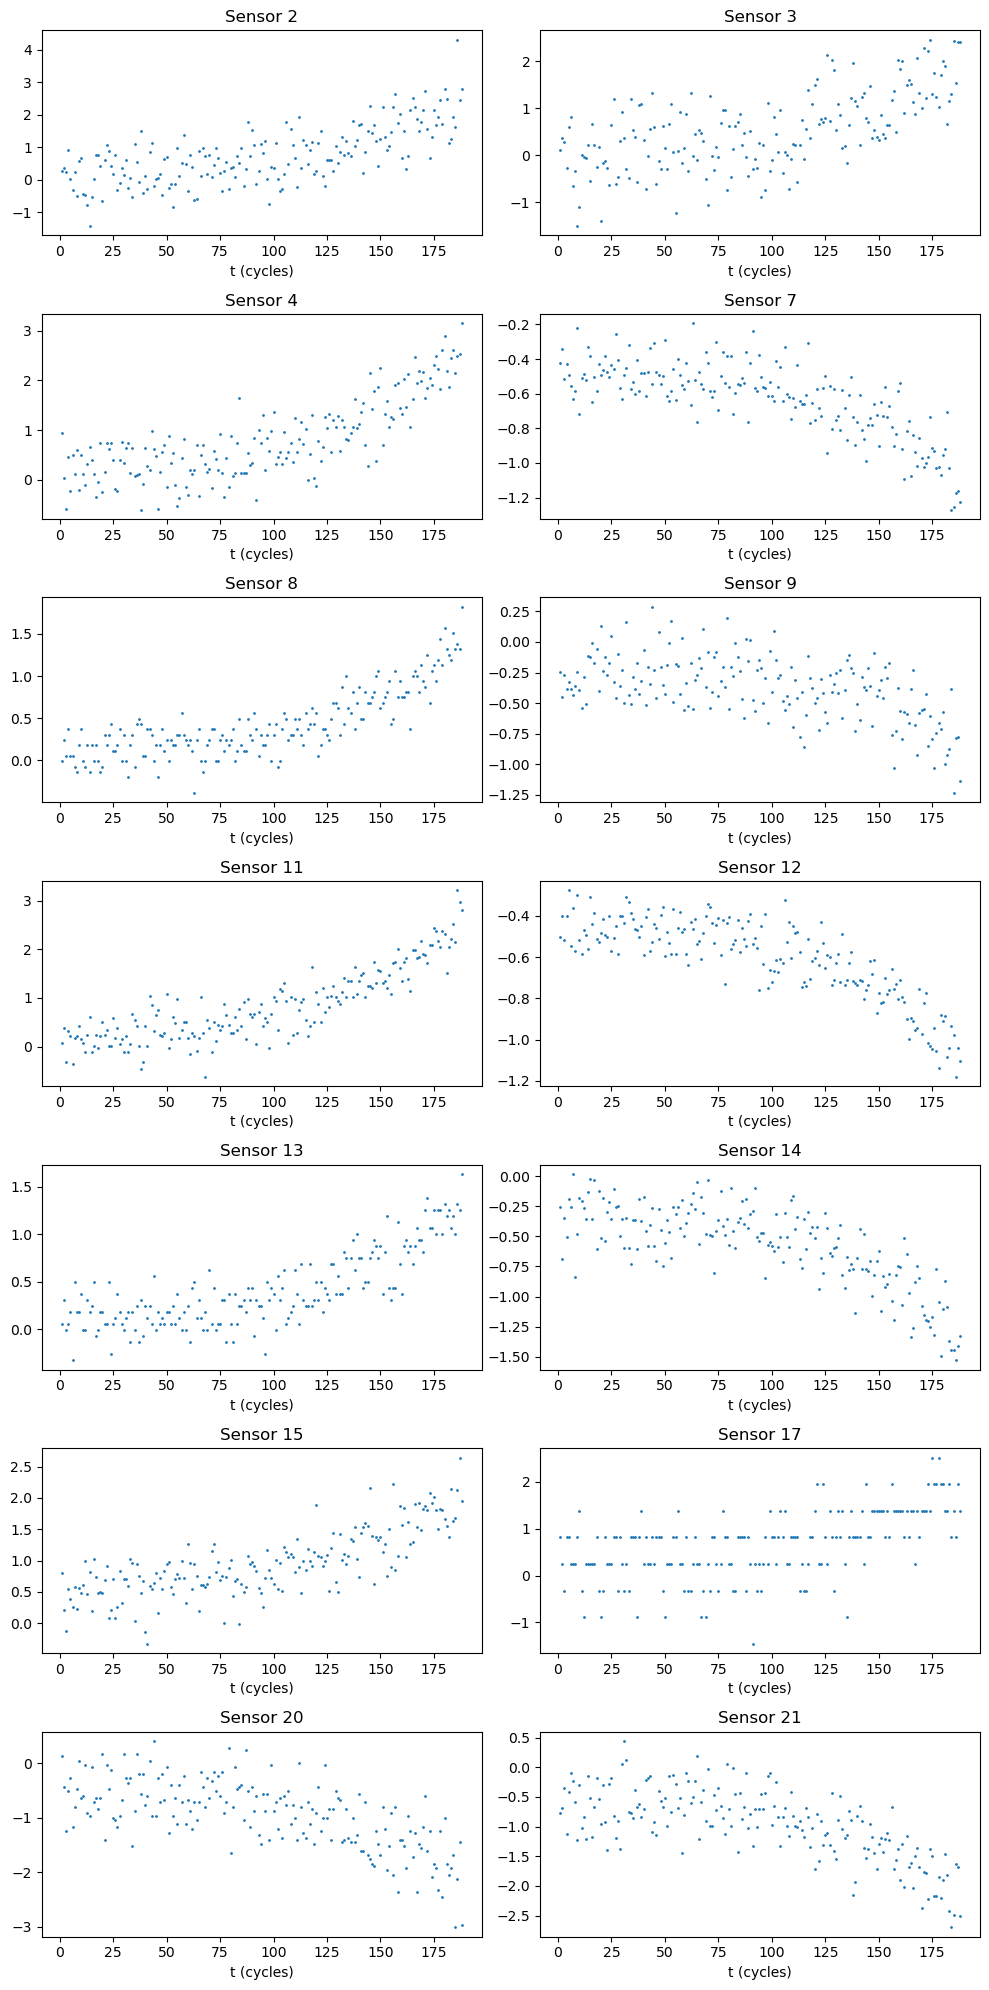

In [158]:
def standard_norm(df, sensor_names):
    title = df.iloc[:, 0:2]
    RUL = df['RUL']
    flat = df['FLAT']
    data = df[sensor_names]
    data_norm = (data-data.mean())/data.std()  # standard normalization
    df_norm = pd.concat([title, data_norm, RUL, flat], axis=1)
    return df_norm

norm_sensors = sensor_names

df_standard = standard_norm(df, norm_sensors)
plot_all_sensors(df_standard, engine_id, sensor_ids)

# t - SNE

The below plots the t-SNE with three different clustering methods.

1. Clusters define the value of the RUL
2. Clusters define operational conditions
3. Clusters define fault mode

{'0 - 50': [array([15.9201975, 52.000206 ], dtype=float32), array([21.046364, 45.353363], dtype=float32), array([24.006626, 55.791546], dtype=float32), array([27.633257, 56.476524], dtype=float32), array([28.297234, 48.944637], dtype=float32), array([20.35559 , 56.355297], dtype=float32), array([27.771214, 60.56922 ], dtype=float32), array([35.151077, 60.821514], dtype=float32), array([32.453915, 56.522667], dtype=float32), array([22.492275, 55.26881 ], dtype=float32), array([27.9446 , 57.68835], dtype=float32), array([26.49065, 58.88215], dtype=float32), array([28.835424, 70.01788 ], dtype=float32), array([36.08207, 63.03204], dtype=float32), array([33.021687, 61.302647], dtype=float32), array([36.099083, 60.376663], dtype=float32), array([25.811457, 67.571884], dtype=float32), array([39.663612, 60.081856], dtype=float32), array([31.107182, 60.135338], dtype=float32), array([37.819088, 57.644623], dtype=float32), array([42.066044, 65.7367  ], dtype=float32), array([32.30508 , 54.52583

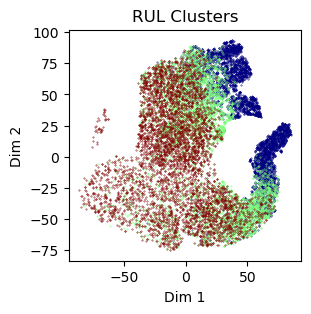

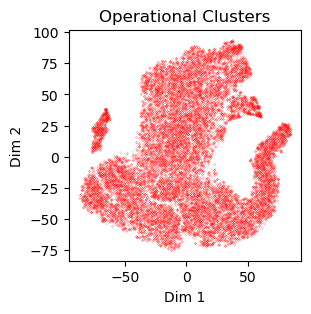

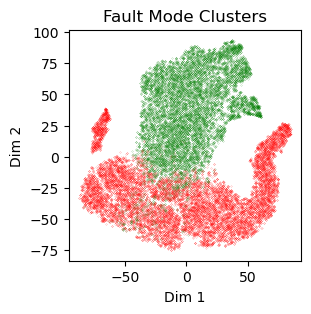

In [159]:
with open (f'Embedded_Arrays/embedded_data_2D_{dataset_id}.npy', 'rb') as f:
    embedded = np.load(f)
with open (f'Embedded_Arrays/embedded_data_3D_{dataset_id}.npy', 'rb') as f:
    ewma_TSNE = np.load(f)

# Example usage with updated interval_list handling:
interval_list = [0, 50, 100, 150]  # Define your specific interval boundaries
plot_clusters_RUL(df_standard['RUL'].to_numpy(), embedded, interval_list, num_dimensions=2)
plot_clusters_kmeans(embedded, cluster_labels, 'Operational Clusters')
plot_clusters_kmeans(embedded, fault_mode_clusters, 'Fault Mode Clusters')

Uncomment the following block of code to retrain the t-SNE for this dataset and update it to the pickled files.

In [160]:
# x_train = df_standard[sensor_names].to_numpy()
# embedded = embed(x_train, 2)
# with open (f'Embedded_Arrays/embedded_data_2D_{dataset_id}.npy', 'wb') as f:
#     np.save(f, embedded)